In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.api import VAR
import statsmodels.api as sm

# Load the dataset
df = pd.read_csv("C:/Users/manos/OneDrive/Desktop/GitHub/Portfolio1/Project_1_Economic_indicators_analysis_forecasting/Dataset1_Portfolio1.csv") 
# Display the first few rows
print(df.head())

    Obs  GDP growth  Inflation rate  Unemployment rate
0  1991     3.10000       19.455846              7.572
1  1992     0.70000       15.877074              8.927
2  1993    -1.60000       14.411264             10.177
3  1994     2.00000       10.874076              9.808
4  1995     2.09972        8.934514             10.116


In [10]:
print(df.isnull().sum())  # Check missing values in each column
print(df.dtypes)  # Check data types

Obs                  0
GDP growth           0
Inflation rate       0
Unemployment rate    0
dtype: int64
Obs                    int64
GDP growth           float64
Inflation rate       float64
Unemployment rate    float64
dtype: object


In [11]:
# Rename Columns for Clarity
df.columns = ["Year", "GDP Growth (annual %)", "Inflation Rate (annual %)", "Unemployment Rate (% of total labor forces)"]
print(df.head())

   Year  GDP Growth (annual %)  Inflation Rate (annual %)  \
0  1991                3.10000                  19.455846   
1  1992                0.70000                  15.877074   
2  1993               -1.60000                  14.411264   
3  1994                2.00000                  10.874076   
4  1995                2.09972                   8.934514   

   Unemployment Rate (% of total labor forces)  
0                                        7.572  
1                                        8.927  
2                                       10.177  
3                                        9.808  
4                                       10.116  


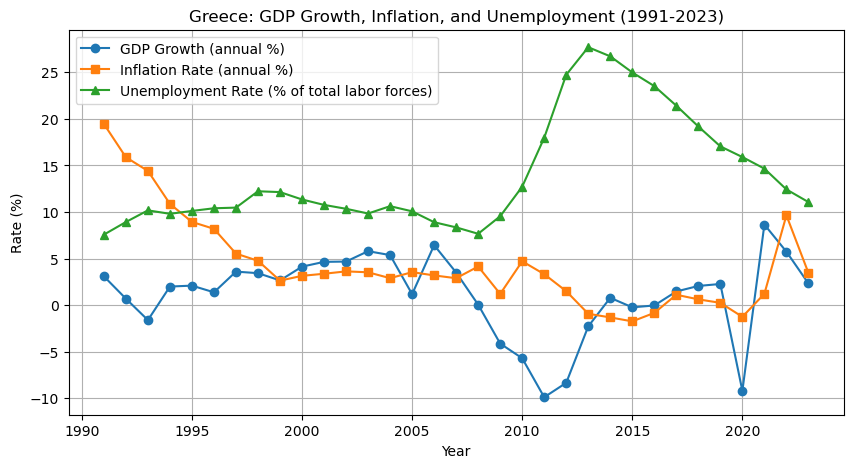

In [12]:
#  plot the trends to observe how the indicators change over the years.

# Set figure size
plt.figure(figsize=(10, 5))

# Plot each variable
plt.plot(df["Year"], df["GDP Growth (annual %)"], label="GDP Growth (annual %)", marker="o")
plt.plot(df["Year"], df["Inflation Rate (annual %)"], label="Inflation Rate (annual %)", marker="s")
plt.plot(df["Year"], df["Unemployment Rate (% of total labor forces)"], label="Unemployment Rate (% of total labor forces)", marker="^")

# Labels & Title
plt.xlabel("Year")
plt.ylabel("Rate (%)")
plt.title("Greece: GDP Growth, Inflation, and Unemployment (1991-2023)")
plt.legend()
plt.grid()

# Show the plot
plt.show()

In [13]:
# Save the Cleaned Dataset

df.to_csv("C:/Users/manos/OneDrive/Desktop/GitHub/Portfolio1/Project_1_Economic_indicators_analysis_forecasting/Greece_economic_indicators_cleaned.csv", index=False)

In [14]:
# Check for correlations between GDP, Inflation, and Unemployment

# Compute the correlation matrix
correlation_matrix = df[["GDP Growth (annual %)", "Inflation Rate (annual %)", "Unemployment Rate (% of total labor forces)"]].corr()

# Display the correlation matrix
print(correlation_matrix)

                                             GDP Growth (annual %)  \
GDP Growth (annual %)                                     1.000000   
Inflation Rate (annual %)                                 0.162366   
Unemployment Rate (% of total labor forces)              -0.390070   

                                             Inflation Rate (annual %)  \
GDP Growth (annual %)                                         0.162366   
Inflation Rate (annual %)                                     1.000000   
Unemployment Rate (% of total labor forces)                  -0.598931   

                                             Unemployment Rate (% of total labor forces)  
GDP Growth (annual %)                                                          -0.390070  
Inflation Rate (annual %)                                                      -0.598931  
Unemployment Rate (% of total labor forces)                                     1.000000  


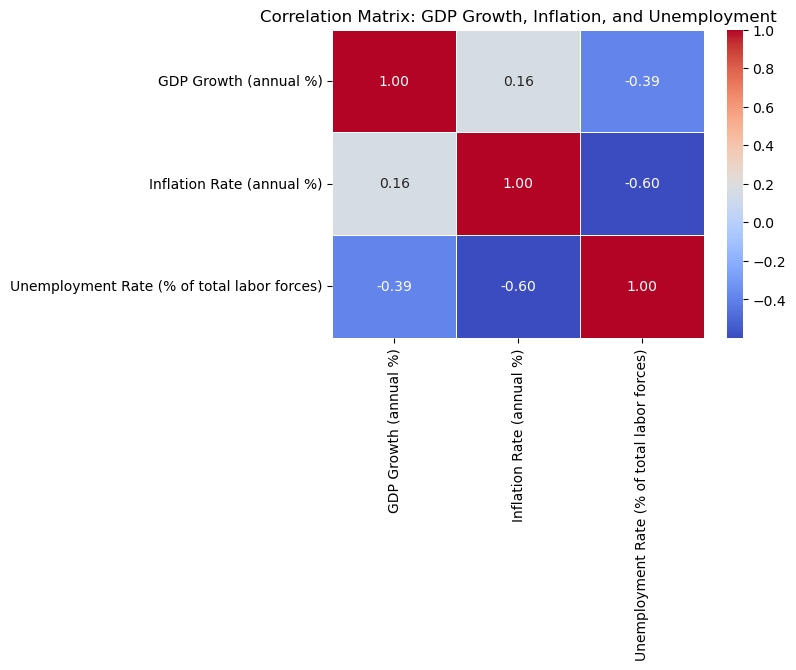

In [15]:
# Heatmap to visualize the Correlation Matrix 


# Set figure size
plt.figure(figsize=(6,4))

# Create heatmap
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)

# Title
plt.title("Correlation Matrix: GDP Growth, Inflation, and Unemployment")
plt.show()

In [16]:
# Run a regression analysis to see if inflation or unemployment can predict GDP growth.

# Load the cleaned dataset
df = pd.read_csv("C:/Users/manos/OneDrive/Desktop/GitHub/Portfolio1/Project_1_Economic_indicators_analysis_forecasting/Greece_economic_indicators_cleaned.csv")


# Define independent variables (Inflation Rate  & Unemployment Rate)
X = df[["Inflation Rate (annual %)", "Unemployment Rate (% of total labor forces)"]]
X = sm.add_constant(X)  # Add constant for intercept

# Define dependent variable (GDP Growth)
Y = df[["GDP Growth (annual %)"]]

# Run multiple regression model
model = sm.OLS(Y, X).fit()

# Display regression results
print(model.summary())


                              OLS Regression Results                             
Dep. Variable:     GDP Growth (annual %)   R-squared:                       0.160
Model:                               OLS   Adj. R-squared:                  0.104
Method:                    Least Squares   F-statistic:                     2.859
Date:                   Sat, 15 Feb 2025   Prob (F-statistic):             0.0731
Time:                           13:10:09   Log-Likelihood:                -92.449
No. Observations:                     33   AIC:                             190.9
Df Residuals:                         30   BIC:                             195.4
Df Model:                              2                                         
Covariance Type:               nonrobust                                         
                                                  coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------

In [17]:
# Before forecasting, we need to check if the time series is stationary (i.e., mean and variance remain constant over time).


# Function to perform ADF Test
def adf_test(series, column_name):
    result = adfuller(series)
    print(f"🔍 ADF Test for {column_name}")
    print(f"Test Statistic: {result[0]}")
    print(f"P-Value: {result[1]}")
    print("Conclusion: Stationary" if result[1] < 0.05 else "Conclusion: Non-Stationary")
    print("-" * 50)

# Apply ADF test on each variable
adf_test(df["GDP Growth (annual %)"], "GDP Growth")
adf_test(df["Inflation Rate (annual %)"], "Inflation Rate")
adf_test(df["Unemployment Rate (% of total labor forces)"], "Unemployment Rate")


🔍 ADF Test for GDP Growth
Test Statistic: -3.3061864130986396
P-Value: 0.0146041962404156
Conclusion: Stationary
--------------------------------------------------
🔍 ADF Test for Inflation Rate
Test Statistic: -3.5416952714079275
P-Value: 0.006978659378036286
Conclusion: Stationary
--------------------------------------------------
🔍 ADF Test for Unemployment Rate
Test Statistic: -1.8785560947357074
P-Value: 0.34221525916288087
Conclusion: Non-Stationary
--------------------------------------------------


In [18]:
# Since Unemployment Rate is non-stationary, we need to differentiate it (take the first difference)
# First difference transformation
df["Unemployment Rate Diff"] = df["Unemployment Rate (% of total labor forces)"].diff()

# Re-run the ADF test on the transformed variable
adf_test(df["Unemployment Rate Diff"].dropna(), "Unemployment Rate (Differenced)")


🔍 ADF Test for Unemployment Rate (Differenced)
Test Statistic: -2.7890379328586414
P-Value: 0.05985676284834257
Conclusion: Non-Stationary
--------------------------------------------------


In [19]:
# Apply second difference to Unemployment Rate
df["Unemployment Rate Diff2"] = df["Unemployment Rate Diff"].diff()

# Re-run ADF test on second-differenced unemployment rate
adf_test(df["Unemployment Rate Diff2"].dropna(), "Unemployment Rate (Second Differenced)")


🔍 ADF Test for Unemployment Rate (Second Differenced)
Test Statistic: -4.101458486924538
P-Value: 0.0009631621515460666
Conclusion: Stationary
--------------------------------------------------


In [20]:
# Choose a Forecasting Method
# We have two main options:

# ARIMA Model (Best for forecasting one variable at a time, e.g., predicting GDP Growth based on past values)
# VAR Model (Best for multiple time-series variables that influence each other, e.g., GDP Growth, Inflation, and Unemployment together)

# Since we have multiple economic indicators, a VAR (Vector Autoregression) model would be ideal

# Drop missing values after second differencing
df.dropna(inplace=True)

# Select the transformed stationary variables
df_forecast = df[["GDP Growth (annual %)", "Inflation Rate (annual %)", "Unemployment Rate Diff2"]]

# Fit VAR model
model = VAR(df_forecast)
model_fitted = model.fit(2)

# Forecast next 5 years
forecast_steps = 5
forecast = model_fitted.forecast(df_forecast.values[-2:], steps=forecast_steps)

# Convert forecast to DataFrame
forecast_df = pd.DataFrame(forecast, columns=["GDP Growth Forecast", "Inflation Rate Forecast", "Unemployment Rate Diff2 Forecast"])
forecast_df.index = range(df["Year"].max() + 1, df["Year"].max() + 1 + forecast_steps)

# Convert Unemployment Rate back to original scale
forecast_df["Unemployment Rate Forecast"] = df["Unemployment Rate (% of total labor forces)"].iloc[-1] + forecast_df["Unemployment Rate Diff2 Forecast"].cumsum()

# Drop difference column (we only need the real forecast)
forecast_df.drop(columns=["Unemployment Rate Diff2 Forecast"], inplace=True)

# Show the final forecast
print(forecast_df)


      GDP Growth Forecast  Inflation Rate Forecast  Unemployment Rate Forecast
2024             4.009068                 4.291930                   11.049374
2025             2.418362                 4.043709                   11.047297
2026             2.316743                 3.259404                   11.312989
2027             1.965515                 3.372300                   11.338939
2028             1.725363                 3.022714                   11.398893


C:\Users\manos\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


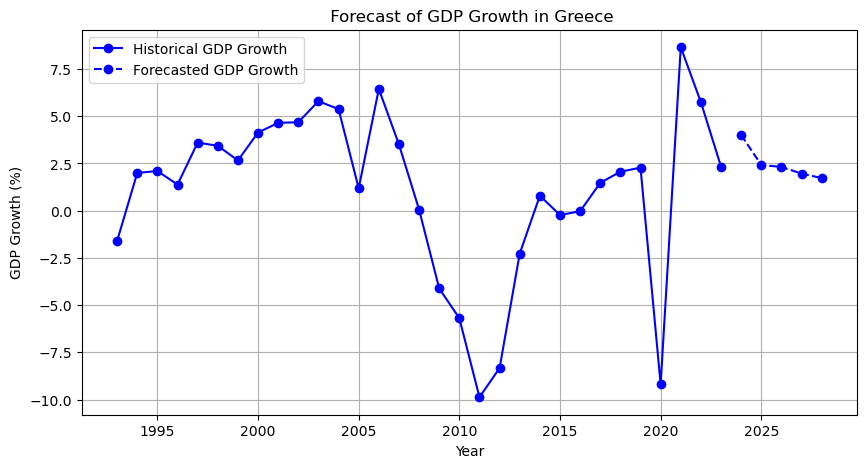

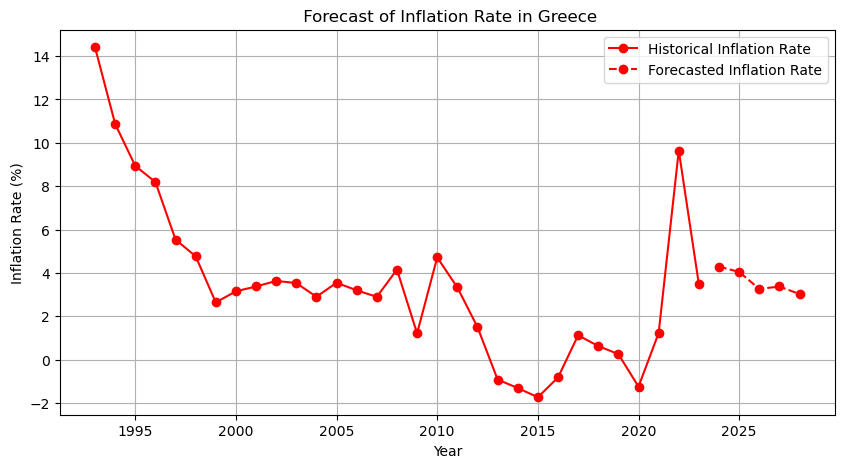

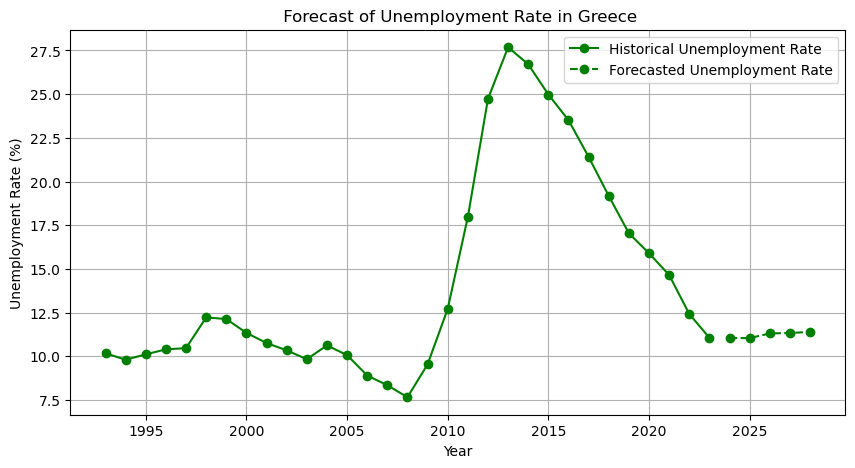

In [21]:
# Plot GDP Growth Forecast
plt.figure(figsize=(10, 5))
plt.plot(df["Year"], df["GDP Growth (annual %)"], label="Historical GDP Growth", marker="o", color="blue")
plt.plot(forecast_df.index, forecast_df["GDP Growth Forecast"], label="Forecasted GDP Growth", linestyle="dashed", marker="o", color="blue")

plt.xlabel("Year")
plt.ylabel("GDP Growth (%)")
plt.title(" Forecast of GDP Growth in Greece")
plt.legend()
plt.grid()
plt.show()

# Plot Inflation Rate Forecast
plt.figure(figsize=(10, 5))
plt.plot(df["Year"], df["Inflation Rate (annual %)"], label="Historical Inflation Rate", marker="o", color="red")
plt.plot(forecast_df.index, forecast_df["Inflation Rate Forecast"], label="Forecasted Inflation Rate", linestyle="dashed", marker="o", color="red")

plt.xlabel("Year")
plt.ylabel("Inflation Rate (%)")
plt.title(" Forecast of Inflation Rate in Greece")
plt.legend()
plt.grid()
plt.show()

# Plot Unemployment Rate Forecast
plt.figure(figsize=(10, 5))
plt.plot(df["Year"], df["Unemployment Rate (% of total labor forces)"], label="Historical Unemployment Rate", marker="o", color="green")
plt.plot(forecast_df.index, forecast_df["Unemployment Rate Forecast"], label="Forecasted Unemployment Rate", linestyle="dashed", marker="o", color="green")

plt.xlabel("Year")
plt.ylabel("Unemployment Rate (%)")
plt.title(" Forecast of Unemployment Rate in Greece")
plt.legend()
plt.grid()
plt.show()